<H1><b>TMDb movie data</b></H1>

<u>(cleaned from original data on Kaggle)</u>

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

Questions to be answered:

<i><H3>
1. Top 5 Movies (rating wise)
2. Top 5 Costliest Movies
3. Top 5 Grossing Movies
4. Top 5 Money Making Movies
5. Top 5 Money losing Movies
6. Most Movie Making Director
7. Best Movies Each Year (Earning Wise)
8. Top 5 Successful Director (Earning Wise)
9. Visualize how top earnings have grown through out the years
10. Visualize losses through out the years (in terms of Percentage)
11. Analyze the pattern of movie making by the most successful Director 
</H3></i>

Note : (Limitations) Movies will be considered for shortlisting only if below conditions are satisfied:
1. Movie run time is greater than 90 Minutes
2. budget is greater than 0
3. revenue is greater than 0
4. Director in not blank

In [2]:
#library declarations
import numpy as np
import pandas as pd

In [3]:
def read_csv(Path):
    '''
    This Function takes Full Path Name as input and loads the
    csv using pandas read_csv method'''
    df = pd.read_csv(Path)
    return df

Path = "tmdb-movies.csv"
movies_df = read_csv(Path)

In [4]:
# Cleaning Data
movies_df = movies_df[movies_df['runtime'] >= 90]
movies_df = movies_df[movies_df['budget'] > 0]
movies_df = movies_df[movies_df['revenue'] > movies_df['popularity'].std()]
movies_df = movies_df[movies_df['director'] != '' ]

In [5]:
print(len(movies_df))
movies_df.head(1)

3434


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [91]:
def top5(df,column,extra=''):
    '''This Function returns the top 5 of the required data point'''
    if extra == '':
        top5_df = df.sort_values(column,ascending=False)[['original_title','vote_average','budget','runtime','revenue','popularity','release_year','director','genres']]
    else:
        top5_df = df.sort_values(column,ascending=False)[['original_title','vote_average','budget','runtime','revenue','popularity','release_year','director','genres',extra]]
    return top5_df

<b>1. Top 5 Movies rating wise</b>
<ul>Movie Name	-> Rating</ul>
<ul>The Shawshank Redemption -> 8.4</ul>
<ul>The Godfather -> 8.3</ul>
<ul>Whiplash -> 8.2</ul>
<ul>The Godfather:  Part II -> 8.1</ul>
<ul>Forrest Gump -> 8.1</ul>

In [94]:
top_rated_movies = top5(movies_df,'vote_average')
top_rated_movies.head(5)

,original_title,vote_average,budget,runtime,revenue,popularity,release_year,director,genres
4178,The Shawshank Redemption,8.4,25000000,142,28341469,7.192039,1994,Frank Darabont,Drama|Crime
7269,The Godfather,8.3,6000000,175,245066411,5.738034,1972,Francis Ford Coppola,Drama|Crime
650,Whiplash,8.2,3300000,105,13993093,4.780419,2014,Damien Chazelle,Drama|Music
9758,The Godfather: Part II,8.1,13000000,200,47542841,3.264571,1974,Francis Ford Coppola,Drama|Crime
4179,Forrest Gump,8.1,55000000,142,677945399,6.715966,1994,Robert Zemeckis,Comedy|Drama|Romance


<b>2. Top 5 Costliest Movies</b>
<ul>The Warrior's Way</ul>
<ul>Pirates of the Caribbean: On Stranger Tides</ul>
<ul>Pirates of the Caribbean: At World's End</ul>
<ul>Avengers: Age of Ultron	</ul>
<ul>Superman Returns</ul>

In [100]:
top_budget_movies = top5(movies_df,'budget')
top_budget_movies.head(5)

,original_title,vote_average,budget,runtime,revenue,popularity,release_year,director,genres
2244,The Warrior's Way,6.4,425000000,100,11087569,0.250540,2010,Sngmoo Lee,Adventure|Fantasy|Action|Western|Thriller
3375,Pirates of the Caribbean: On Stranger Tides,6.3,380000000,136,1021683000,4.955130,2011,Rob Marshall,Adventure|Action|Fantasy
7387,Pirates of the Caribbean: At World's End,6.8,300000000,169,961000000,4.965391,2007,Gore Verbinski,Adventure|Fantasy|Action
14,Avengers: Age of Ultron,7.4,280000000,141,1405035767,5.944927,2015,Joss Whedon,Action|Adventure|Science Fiction
6570,Superman Returns,5.3,270000000,154,391081192,1.957331,2006,Bryan Singer,Adventure|Fantasy|Action|Science Fiction


<b>3. Top 5 Grossing Movies</b>
<ul>Avatar</ul>
<ul>Star Wars: The Force Awakens</ul>
<ul>Titanic</ul>
<ul>The Avengers</ul>
<ul>Jurassic World</ul>

In [96]:
top_grossing_movies = top5(movies_df,'revenue')
top_grossing_movies.head(5)

,original_title,vote_average,budget,runtime,revenue,popularity,release_year,director,genres
1386,Avatar,7.1,237000000,162,2781505847,9.432768,2009,James Cameron,Action|Adventure|Fantasy|Science Fiction
3,Star Wars: The Force Awakens,7.5,200000000,136,2068178225,11.173104,2015,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy
5231,Titanic,7.3,200000000,194,1845034188,4.355219,1997,James Cameron,Drama|Romance|Thriller
4361,The Avengers,7.3,220000000,143,1519557910,7.637767,2012,Joss Whedon,Science Fiction|Action|Adventure
0,Jurassic World,6.5,150000000,124,1513528810,32.985763,2015,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller


<b>4. Top 5 Money Making Movies</b>
<ul>Avatar</ul>
<ul>Star Wars: The Force Awakens</ul>
<ul>Titanic</ul>
<ul>Jurassic World</ul>
<ul>Furious 7</ul>

In [97]:
top_profitable_movies = movies_df
top_profitable_movies['earnings'] = top_profitable_movies['revenue'].sub(top_profitable_movies['budget'])
top_profitable_movies = top5(top_profitable_movies,'earnings','earnings')
top_profitable_movies.head()

,original_title,vote_average,budget,runtime,revenue,popularity,release_year,director,genres,earnings
1386,Avatar,7.1,237000000,162,2781505847,9.432768,2009,James Cameron,Action|Adventure|Fantasy|Science Fiction,2544505847
3,Star Wars: The Force Awakens,7.5,200000000,136,2068178225,11.173104,2015,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,1868178225
5231,Titanic,7.3,200000000,194,1845034188,4.355219,1997,James Cameron,Drama|Romance|Thriller,1645034188
0,Jurassic World,6.5,150000000,124,1513528810,32.985763,2015,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,1363528810
4,Furious 7,7.3,190000000,137,1506249360,9.335014,2015,James Wan,Action|Crime|Thriller,1316249360


<b>5. Top 5 Money losing Movies</b>
<ul>The Warrior's Way</ul>
<ul>The Lone Ranger</ul>
<ul>The Alamo</ul>
<ul>The 13th Warrior</ul>
<ul>The Adventures of Pluto Nash</ul>

In [98]:
top_loss_movies = movies_df
top_loss_movies['earnings'] = top_loss_movies['revenue'].sub(top_loss_movies['budget'])
top_loss_movies = top_loss_movies[top_loss_movies['earnings'] < 0]
top_loss_movies = top_loss_movies.sort_values('earnings')
top_loss_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,earnings
2244,46528,tt1032751,0.250540,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/10,74,6.4,2010,4.250000e+08,1.108757e+07,-413912431
5508,57201,tt1210819,1.214510,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,http://disney.go.com/the-lone-ranger/,Gore Verbinski,Never Take Off the Mask,...,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,7/3/13,1607,6.0,2013,2.386885e+08,8.357833e+07,-165710090
7031,10733,tt0318974,0.948560,145000000,25819961,The Alamo,Dennis Quaid|Billy Bob Thornton|Jason Patric|P...,NaN,John Lee Hancock,You will never forget,...,137,Western|History|War,Imagine Entertainment|Touchstone Pictures,4/7/04,60,5.9,2004,1.673946e+08,2.980774e+07,-119180039
2435,1911,tt0120657,1.189386,160000000,61698899,The 13th Warrior,Antonio Banderas|Vladimir Kulich|Dennis StorhÃ...,NaN,John McTiernan,Prey for the living.,...,102,Adventure|Fantasy|Action,Touchstone Pictures,8/27/99,275,6.2,1999,2.094485e+08,8.076712e+07,-98301101
4078,11692,tt0180052,0.912373,100000000,7103973,The Adventures of Pluto Nash,Eddie Murphy|Randy Quaid|Rosario Dawson|Joe Pa...,NaN,Ron Underwood,Action's future has arrived...,...,95,Action|Comedy|Science Fiction,Village Roadshow Pictures|Castle Rock Entertai...,8/15/02,75,4.6,2002,1.212261e+08,8.611872e+06,-92896027


<b>6. Most Movie Making Director</b>
<ul>Steven Spielberg </ul>

In [12]:
movies_df.groupby('director')['director'].count().sort_values(ascending=False).head(1)

director
Steven Spielberg    27
Name: director, dtype: int64

<b>7. Best Movies Each Year (Earning Wise)</b>

In [99]:
best_movies = top_profitable_movies
best_movies = best_movies.drop_duplicates('release_year').sort_values('release_year')
best_movies

,original_title,vote_average,budget,runtime,revenue,popularity,release_year,director,genres,earnings
10143,Spartacus,6.9,12000000,197,60000000,1.136943,1960,Stanley Kubrick,Action|Drama|History,48000000
10112,West Side Story,6.6,6000000,152,43656822,0.900245,1961,Jerome Robbins|Robert Wise,Music|Crime|Drama,37656822
9849,Dr. No,6.7,1100000,110,59600000,3.170651,1962,Terence Young,Adventure|Action|Thriller,58500000
10438,From Russia With Love,6.7,2500000,115,78898765,2.508235,1963,Terence Young,Action|Thriller|Adventure,76398765
9881,Goldfinger,7.0,3500000,110,124900000,3.153791,1964,Guy Hamilton,Adventure|Action|Thriller,121400000
10690,The Sound of Music,7.2,8200000,174,163214286,1.313676,1965,Robert Wise,Drama|Family|Music|Romance,155014286
10822,Who's Afraid of Virginia Woolf?,7.5,7500000,131,33736689,0.670274,1966,Mike Nichols,Drama,26236689
10401,You Only Live Twice,6.2,9500000,117,111584787,1.554808,1967,Lewis Gilbert,Action|Thriller|Adventure,102084787
9719,2001: A Space Odyssey,7.7,12000000,149,56715371,3.309196,1968,Stanley Kubrick,Science Fiction|Mystery|Adventure,44715371
10725,Butch Cassidy and the Sundance Kid,7.0,6000000,110,102308889,1.357317,1969,George Roy Hill,History|Drama|Western|Crime,96308889


<b>8. Top 5 Successful Director (Earning Wise)</b>
<ul>Steven Spielberg</ul>
<ul>James Cameron</ul>
<ul>Peter Jackson</ul>
<ul>Terence Young</ul>
<ul>Stanley Kubrick</ul>

In [14]:
best_movies.groupby('director')['director'].count().sort_values(ascending=False).head(5)

director
Steven Spielberg    6
James Cameron       3
Peter Jackson       3
Terence Young       2
Stanley Kubrick     2
Name: director, dtype: int64

<b>9. Visualize how top earnings have grown through out the years</b>

The Below graph suggest that the profit has grown linearly throughout the years. As we can also see that the correlation between Years and Earnings have come about 0.77.Hence we can say that as we advance in time, The profit are going to be even higher.

<img src = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAY8AAAESCAYAAAAFYll6AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAIABJREFUeJzt3Xt4nHd95/33d04aSZZsWYpjJ7bjg5ykCRAOysn2BsMu%0ALFCatAssAUqh7V6hvaBND3Tb7rNNu+nTLbQ8bMMVKAmHcigQCmXb8DwBllNqYsdJ7JyI4xxkJ7bl%0AsyVbxxnN6ff8cd8jz4xmpBlpRjMjfV7XpUvje26Nfrdlz1e/+/f7fr/mnENERKQSgXoPQEREmo+C%0Ah4iIVEzBQ0REKqbgISIiFVPwEBGRiil4iIhIxZoyeJjZF83stJk9U8a5l5nZj83saTN70MzWLsQY%0ARUQWs6YMHsCXgLeUee4ngK84514F3An8da0GJSKyVDRl8HDO7QSGco+Z2WYz+76Z7TOzn5nZlf5T%0AVwE/9h//FLhlAYcqIrIoNWXwKOFe4Hecc68DPgp8xj/+FPAO//GvAB1m1l2H8YmILBqheg+gGsxs%0AGbAV+JaZZQ+3+J8/CtxtZh8EdgLHgNRCj1FEZDFZFMEDbwZ13jn36sInnHPHgf8EU0HmHc654QUe%0An4jIorIobls550aAl8zsXQDmucZ/3GNm2ev8U+CLdRqmiMii0ZTBw8y+ATwMXGFmA2b2m8D7gN80%0As6eA/VxYGN8BPG9mLwAXA39VhyGLiCwqppLsIiJSqaaceYiISH013YJ5T0+P27BhQ72HISLSVPbt%0A23fWOXdRtV6v6YLHhg0b2Lt3b72HISLSVMzscDVfT7etRESkYgoeIiJSMQUPERGpmIKHiIhUTMFD%0AREQq1nS7rUREqunB505zz85DHD03wbquNj500yZ2XLmq3sNqeJp5iMiS9eBzp7nj/v2cHo2zojXM%0A6dE4d9y/nwefO13voTU8BQ8RWbLu2XmIcNBoi4Qw8z6Hg8Y9Ow/Ve2gNr2bBw8zWmdlPzeyAme03%0As9uLnLPDzIbN7En/445ajUdEpNDRcxO0hoN5x1rDQQbOTdRpRM2jlmseKeAPnXOPm1kHsM/Mfuic%0Ae7bgvJ85595ew3GIiBS1rquN06Nx2iIX3gpjyTRru9rqOKrmULOZh3PuhHPucf/xKHAAuLRW309E%0ApFIfumkTybRjIpHCOe9zMu340E2b6j20hrcgax5mtgF4DfBIkadvNLOnzOx7ZnZ1ia+/zcz2mtne%0AM2fO1HCkIrKU7LhyFXfefDWrOqIMx5Ks6ohy581Xa7dVGWrez8Nv/fpvwF85575T8FwnkHHOjZnZ%0A24C7nHNbZnq9vr4+p8KIIiKVMbN9zrm+ar1eTWceZhYG/hn4WmHgAK99rHNuzH/8ABA2s55ajklE%0AROavlrutDPgCcMA598kS56z2z8PMrvPHM1irMYmISHXUcrfVNuD9wM/N7En/2H8D1gM45z4LvBP4%0AbTNLATHgVqe+uCIiDa9mwcM59xBgs5xzN3B3rcYgIiK1oQxzERGpmIKHiIhUTMFDREQqpuAhIiIV%0AU/AQEZGKKXiIiEjFFDxERKRiCh4iIlIxBQ8REamYgoeIiFRMwUNERCqm4CEiIhVT8BARkYopeIiI%0ASMUUPEREpGIKHiIiUjEFDxERqZiCh4iIVEzBQ0REKqbgISIiFVPwEBGRiil4iIhIxRQ8RESkYgoe%0AIiJSMQUPERGpmIKHiIhUrGbBw8zWmdlPzeyAme03s9uLnGNm9ikz6zezp83stbUaj4iIVE+ohq+d%0AAv7QOfe4mXUA+8zsh865Z3POeSuwxf+4Hvh7/7OIiDSwms08nHMnnHOP+49HgQPApQWn3QJ8xXn2%0AACvMbE2txiQiItWxIGseZrYBeA3wSMFTlwJHc/48wPQAg5ndZmZ7zWzvmTNnajVMEREpU82Dh5kt%0AA/4Z+D3n3Ejh00W+xE074Ny9zrk+51zfRRddVIthiohIBWoaPMwsjBc4vuac+06RUwaAdTl/Xgsc%0Ar+WYRERk/mq528qALwAHnHOfLHHa/cCv+buubgCGnXMnajUmERGpjlruttoGvB/4uZk96R/7b8B6%0AAOfcZ4EHgLcB/cAE8Os1HI+IiFRJzYKHc+4hiq9p5J7jgA/XagwiIlIbtZx5iIjIDB587jT37DzE%0A0XMTrOtq40M3bWLHlavqPayyqDyJiEgdPPjcae64fz+nR+OsaA1zejTOHffv58HnTtd7aGVR8BAR%0AqYN7dh4iHDTaIiHMvM/hoHHPzkP1HlpZFDxEROrg6LkJWsPBvGOt4SAD5ybqNKLKKHiIiNTBuq42%0AYsl03rFYMs3arrY6jagyCh4iInXwoZs2kUw7JhIpnPM+J9OOD920qd5DK4uCh4hIHey4chV33nw1%0AqzqiDMeSrOqIcufNVzfNbitt1RURqZMdV65qmmBRSDMPERGpmIKHiIhUTMFDREQqpuAhIiIVU/AQ%0AEZGKKXiIiEjFFDxERKRiyvMQEaC5y4PLwtPMQ0Savjy4LDwFDxFp+vLgsvAUPESk6cuDy8JT8BCR%0Api8PLgtPwUNEmr48uMwskcpU/TW120pEvPLgeGsfA+cmWKvdVk0vk3GMJVKMxlNMFswqq0HBQ0SA%0A5i4PLhdMptKMxFKMT6bIOFez76PgISLS5JxzjE7WbpZRjIKHiEiTSqQyjMSTjMVrO8sopmYL5mb2%0ARTM7bWbPlHh+h5kNm9mT/scdtRqLiMhi4ZxjbDLF8fMxBs5NMBJLLnjggNrOPL4E3A18ZYZzfuac%0Ae3sNxyAisigk0xlGYknGJlOkMwsfLArVLHg453aa2YZavb6IyGLnnGM8kWY0niSWWJi1jHLVe83j%0ARjN7CjgOfNQ5t7/YSWZ2G3AbwPr16xdweCIiC28ylWYsnmqYWUYx9QwejwOXOefGzOxtwL8AW4qd%0A6Jy7F7gXoK+vrzH/JkVE5qHWeRnVVrcMc+fciHNuzH/8ABA2s556jUdEpB5iiTSnR+McHprg7Ohk%0AUwQOqOPMw8xWA6ecc87MrsMLZIP1Go+IyEJJpTOM+XkZyXT1S4cshJoFDzP7BrAD6DGzAeDPgTCA%0Ac+6zwDuB3zazFBADbnWuDvvNREQWgFczLM1oPMVEIlXv4cxbLXdbvWeW5+/G28orIrJoJVIZRuON%0As8W2Wuq920pEZNFptsXvuVDwEBGpkngyzUg8yfhkmsV+F77i4GFmAWCZc26kBuMREWkqi2Hxey7K%0A2qprZl83s04zaweeBZ43sz+q7dBERBqTc47xyRQnh+McGZpgaDyxpAIHlJ/ncZU/0/hl4AFgPfD+%0Amo1KRKQBJVIZhsYTHBma4NRIvCl2TcUSaXa+cKbqr1vubauwmYXxgsfdzrmkmS3uG3oiIlyoYjsa%0ATxEvWPx+9NAQ9z12lBMjMdZ0tnLrteu4btPKOo30gqHxBLsPDrL74Fn2HT5HMl39t+tyg8c9wMvA%0AU8BOM7sM0JqHiCxa8aSXk1GqI9+jh4a46ycvEgoYndEQg+OT3PWTF7mdLXUJIEeGJtjdf5aH+gc5%0AcGKE3BGHAlb171dW8HDOfQr4VM6hw2b2hqqPRkSkjtIZx1g8xehkkkRq5jWM+x47SihgtIaDALSG%0Ag8SSae577OiCBI+Mczx3YpSH+s+y++AgR4Ym8p5viwS5fuNKtvX2cN3GlVzz19X9/mUFDzP7gyKH%0Ah81sn3PuyeoOSURkYcX8sufjifK32J4YidEZzX8LjYYDnByJ1WKIgLfm8viRc+zqH+ThQ4MMjSfy%0Anu9eFmHb5h629Xbz6nUrCAdrV76w3NtWff7Hd/0//yLwGPBbZvYt59zf1GJwIiK1kkxnvFlGPEUq%0AU/lOqTWdrQyOT07NPADiyQyrO1urOUxG40n2HBpi18GzPPrSEPFk/lg3dLexrdcLGJdf3EHAqn+L%0Aqphyg0c38NpsFVwz+3Pg28BNwD5AwUNEGl41myvdeu067vrJi8SSaaLhAPFkhlTGceu16+Y9zlMj%0AcXb1D7Lr4FmeOnqe3KomBrzi0uVs6+1m2+YeLu2qbrAqV7nBYz2QOz9K4vXiiJnZZPWHJSJSPZOp%0AC4vf1aovdd2mldzOFu577CgnR2KsnsduK+cch86M81D/WXYdHKT/9Fje85FQgL7LutjW28ONm1ay%0Aoi1SlWuYj3KDx9eBPWb2r/6ffwn4Rk7SoIhIQ8lkHKOTKUbjsy9+l6PUtty5Lo6nM46nB85PzTBO%0AjeT/Ht4ZDXHjZm928boNXXm3xxpBubut/tLMvgdsw5s1/ZZzbq//9PtqNTgRkUrNZfF7NtXalhtL%0ApHns5SF2HRxkz6FBRuP5SYZrlkfZ3tvD1t5uXnHJcoI12GJbLZXUtnoCr9d4CMDM1jvnjtRkVCIi%0AFah1fan5bMsdGk/w8EFvdlEsYe+KizvY2tvNts3dbOxpxxZowXu+yt2q+zt4zZxOAWm82YcDXlW7%0AoYmIlJZd/B5bgOZKlW7LzSbs7To4yLPH8xP2ggHj1etWsL23mxs3dbOqM1rDkddOuTOP24ErnHNq%0AEysidTWZ8gLGQjZXmm1bbrkJe1s393D9xpUsizZ/N4xyr+AoMFzLgYiIlFLv5krFtuUm0xlevW45%0An/zhC+w+OD1hL2DQ1Rbh5msu4d3XriMSql3CXj2UGzwOAQ+a2f8HTG0JcM59siajEhHBX/yerH9z%0Apey23H985DBHz00ARiyZ5ksPH8477+KOFsYSKdojITqjQSZTju/vP8kVF3c0RMHEaio3eBzxPyL+%0Ah4hITWQzv8cmG6O5UjZhb/fBsxw4OZp3qyxgcPUlFxL2/p//80Le7a3WMAta72ohlbtV93/UeiAi%0AUn0PPneae3Ye4ui5CdZ1tfGhmzax48pV9R7WNNnbUmNFyp4vtLIT9jZ3c+Pm7ryEvXrUu6qXGYOH%0Amf2dc+73zOy7wLQ5o3Pu5pqNTETm5cHnTnPH/fsJB40VrWFOj8a54/793AkNE0CyPb8nJtNFy54v%0AlHTG8fNjw96Cd/8gJ0fiec9nE/a2bu6hb4aEvYWqd9UIZpt5fNX//IlaD0REquuenYcIB422iPff%0AvC0SYiKR4p6dh+oaPBql53cs6SXs7e73EvZGiiTsZW9HveLS8hL2alnvqlLhYICWcIDWcLAm2ekz%0ABg/n3D7/879V/TuLSE0dPTfBitZw3rHWcJCBcxMlvqK2xv2AUc/WrbkJe48fOT+tbMnlFy+bKmk+%0Al4S9ata7qlQoECAa8YJFNBysaTl2KD9JcBvwF8Bl/tcY4Jxzm2o3NBGZj3VdbZwejU/NPMD7bXtt%0AV9uCjSGVzjBaRtnzWrZzLTdhb+vmHi7qaJn395tPvatKZINF1J9Z1DpYTPv+ZZ73BeD38cqvl7Wa%0AZWZfBN4OnHbOvaLI8wbcBbwNmAA+6Jx7vMzxiMgsPnTTJu64fz8TidRUOY1k2vGhm2r/O18ls4xq%0At3PNJuztOniWXf3FE/au2+B12GumhL3sbah6BYtC5f6tDTvnvlfha38JuBv4Sonn3wps8T+uB/7e%0A/ywiVbDjylXcibf2MXBugrU13m2VSHlrGWMVNleqRjvXRCrDE0fP+Vtqi3fY27q5m+29PVyzdkXD%0AJ+yZGZFQgJaQFyyioQChOgeLQuUGj5+a2d8C3yE/SbDkTME5t9PMNszwmrcAX3Fe5s8eM1thZmuc%0AcyfKHJOIzGLHlatqujjunJta/J7rFtu5bm8djSd55KUhdvUP8uhLQ8QKvv9l3W1sr0OHvbkIBoyW%0AUJCoP7NoCQUavkBiucEjOyPoyznmgDfO43tfilf2JGvAPzYteJjZbcBtAOvXr5/HtxSRaognLzRX%0Amu8W20q2t+Ym7D01MJyXsGfA1Zd0TrVkXci1nUqFg/6MIhygJRRs+JlQMbMGDzMLAH/vnPunKn/v%0AYmG16L9C59y9wL0AfX199dsMLrKEVbu5UtZM21uzCXu7Dp7lof6ZE/Zu2NxNVwN02CsmErqwVhEN%0ABxu6T0e5Zg0ezrmMmX0EqHbwGAByNz+vxesXIiINJJvIV6v6UoXbWy/uiHLdxpU8eniIv/vxiyUT%0A9hq1wx4szmBRqNzbVj80s48C3wTGswedc0Pz+N73Ax8xs/vwbosNa71DpDHUapZRyivXLWcynWFX%0A/1n2HBrkqWP5RbynEvZ6exqyw14kdCG/YrEGi0LlBo/f8D9/OOeYA0ru+TOzbwA7gB4zG8BrJhUG%0AcM59FngAb5tuP95W3V+vZOAiUn2TqTQjseqsZcymrIS93p6G7LDX4u+Aao0EiYaCBJZAsChUbmHE%0AjZW+sHPuPbM878gPRiJSBws5yzg6NMGug4Ps6j9bMmFv2+Zutm5urA57ChbTlZ0dY2avAK4Cpn6i%0AzrlSORwi0uBqvZYBXsLe8ydHpwoOHm6CDnvZHItWfzeUgkVx5ZYn+XO8W1BX4d1ueivwEKUTAEWk%0AhuZaaj2dcYzFU4zEkzUrSphN2NvtJ+wNlkjY27a5h1evm3/C3nxLm5jZhWQ8P1jsfOFMU5Syrycr%0A5zcOM/s5cA3whHPuGjO7GPi8c+6Xaj3AQn19fW7v3r0L/W1FGkZuqfXcsiN33nx1yTe4Ws8yZkvY%0Ai4YC3LCpm3f1rWV4Isk/7R2oSh2r3NImudt8b39j6dImucEiO7vIXU+Zy99vMzCzfc65vtnPLE+5%0Ac8SYv2U3ZWadwGlmWCwXkdopt9R6rdcyTo/Ep9YviiXshYJGWyTIitYwGQfPnxpl70tDfP/ZU1Wr%0AY1VOaZNgwPwSH0FawoFZs7cbtZR9oyk3eOw1sxV4iXr7gDHgkZqNSkRKmq3Ueq12TDnnOHR2nF39%0AXsHBF4sk7L1ufRfberv53s9PMhJP5uVgxJJp/mnfACvbI/OqY5WrWGmT1nCQ06NxLupomVaavJzb%0AfY1Wyr5RlRs8PgK8F7gYeBOwHojP+BUiUhPFSq1PJFKsXh7l+PlYVdu4Zjvs7eo/y+6Dg5wYzv9v%0AHwwY16xdzi2vvjSvw95X9xwuWq8qm0VeeHyubVrXdLYyNDFJeySEmREwL0hd1t1ORzQ/AJTbWbER%0AStk3g3KDx6eBDPBG59ydZjYM/B/g2pqNTGSOmqVv91zlllpvCQWYSKSZTGV4x2vWViVwzNZhL2hG%0AayTA8tYwBpwYjtMSDOTNMkrVq2oNB6c+5x6vpE1rbkLe776xl7/4f58lkc7krU/cuGkl77l3T96/%0AgXJvR9WzlH0zKbswonPutWb2BIBz7pyZNWYRGVnSmqFv93z9u8sv4k/ecgWff+gljp+vTre6cxN+%0Awl7/IPuOnJu2RrJl1TK29XbzcP8Q44nktN/KC287lapX9Z9ft5bvP3uqrDat2V1UJ0dirO1q479s%0A38ibrl6dl739xqsuJhCwvLLzN25aybcfPzbt38BEIsXqgtyRYrejFrqUfbMqN3gkzSyIX7jQzC7C%0Am4mIlG0hZgSLebEzlkgzGk8ynkhz5ZpOPvGua+b1egPnJtjV7y147y8zYe97z5wsq3z6TO1Yr1jd%0AOWOb1pZwkH0vD3H3g/1EgkbPshbOTST4n997jmg4OO3nWFh2/j337in6byCRyhBLpsu6HVXrUvaL%0AQbnB41PA/wZWmdlfAe8E/nvNRiWLzkLNCBbbYmcynWEsnmJsMjXvvIxswt6u/rP86MBpTo9O5j3f%0AGg5y3caVbO/t5vqN3UUT9iopn16qHWvh8WLZ2x999CgtocC0APCx7x2Y84J3JGgk0063o6qk3PIk%0AXzOzfcC/x9uF98vOuQM1HZksKgs1I1gMi52ZjGMs4XXkm+8aRiKV4cmj56cWvAsT9oIBIxoKEAkF%0A+MP/cDlbt/TM+HozlU8vRzZ7O5qTZ1Ese7tYAEilM7w8GGNDxs1pwXvLxZ1Tax+6HTV/ZdcCcM49%0ABzxXw7HIIrZQM4JmXuyc8APGeGJ+iXxj8RSPvOStXzz68hATifwA1OIHixWtYaJ+zkMsmebbjx+b%0ANXjMdDuqmIDZVGe87OdySn0UCwCnRicJB6bPRipZ8NbtqOqpfyEZWRIWakbQbIudqXSG0bjXxrWS%0Avt+FTo/E2e0n7D05S4e9P/r203RGQ1hOP7ZKtsuWuh0F0xPyonPstVEqAKxd0ZwL3otxB6CChyyI%0AhZwRNPpvl845xhNpxuIpJhKp2b+gxGscOjvO7n6vpPkLp4on7G3vnd5hr5J1i9lMBYuclqrVUCwA%0ARIIBEgXrPs2w4L1YdwAqeMiCaMTfBheSc45YMhsw0nPK/J4tYa8zGuL6Td1s7+3JS9grNJ91i1Ag%0A4BUP9Be3a9l7uzAAZN+Em+2W5GLdAajgIQumkX4bXCjxZJqxSa9USO6tpHLFkmn2vnxuqsNeYcLe%0A6s4LHfZeeWl5HfYqWbcIBQJEI4GpW1G1DBazadZfQBbbDsAsBQ+RKktnHKPxJKPxuW2vPe8n7D00%0AQ8Le9t4etvZ2s2mOHfZKrVuEgzmlyQvqQjWCZvwFZDHsACxGwUOkSiYS3sL3xBx2S82WsHfN2uVs%0A6+1h6+ZuLi7RYW8ufS0iU30svG2zS6H39kJr5h2AM1HwEJmHRCrD2KS3xbaS3VK5CXu7inTYy03Y%0Au27jymlF/grl9rUoVeq8sOlRS0jBYiE06+222Sh4iFQok3GM+7OMSpL4phL2DnotWad12Gv3Ouxt%0A7e3mNeu6KlpfKNbXIp5K80/7jvKWV66eyrGYyy0umb9mvN02GwUPkTLFk2lG45X1yfAS9obY1X+2%0AaMLeZSvbpha8r1jdQWCOb+5eX4swgYARMMPMuyV1ZnSSFW2qYSrVp+AhMoNU2rstVcnidzkJe1t7%0Ae9i2uZt1K+e+aJqbkLehu52zY5NEgxe2504kUk2/KCuNS8FDpEA2iW80niSWmP22lHOOl86Os6t/%0AkIf6z87YYe+GTd2sbJ/bTCBgNlU8MBrJT8j77ddvXpSLstK4FDxkSSinPEQlORnpjOOZY8PsOugt%0AeBdL2Lthk7d+ce2GlSUT9mYSDBgtoQvbZmcq9bFYF2WlcSl4SNOYa32gmcpDbO3tYXyyvJLn8WzC%0A3sGzPHywOgl7ueZb6mMxLspK41LwkKYwn/pAheUhWsNB0pkUn/rxi6zvnnlN4NxEgj0HB9l1cJC9%0Ah0t32Nu2uYdNF1WWsJetONsann4bSqTR1TR4mNlbgLuAIPB559zHCp7/IPC3wDH/0N3Ouc/XckzS%0AnOZTH+jouQmWR0OkM46Mc2QyjnDQOD5cvIpsNmFv98GzPHOseMLe1s1ehdpSCXvF5AaL+VScFWkE%0ANQseftvaTwNvAgaAx8zsfufcswWnftM595FajUMWh7nUB8oWI7y4I8qZsTjRUPEqstmEvd0HvQXv%0Aw4PFE/a29XZzfRkJe1nZpLzWcJDWyPQ8i3Jvwy3Gct7S/Go587gO6HfOHQIws/uAW4DC4CFNbiHe%0A3CqpDxRLeAvfEwlv4ftdr1vLXT95EecuVJFNpjO8Zv0K/tePXvA67I3lJ+ytbI94/bsrTNhr8WcW%0ArbM0Pir3NtxiLectza+WweNS4GjOnweA64uc9w4zuwl4Afh959zRwhPM7DbgNoD169fXYKgyVwv1%0A5jZbfaDJlFfufHwyPa1MSLaK7D8+cpij5yYwvM55/7D75bzzLlvZxtZer6R5uQl72UKCrZHKakOV%0AextusZbzluZXy+BR7H9R4f7H7wLfcM5NmtlvAV8G3jjti5y7F7gXoK+vb+79OaUi5cwoFurNrdhW%0A1P+yfSOvWd/FwLmJaQvZWVMJewcHOXBydFrC3lWXdPozjB7Wl5GwN5VrEQ7SFpl71dlyb8Mt1nLe%0A0vxqGTwGgNzuMmuB47knOOcGc/74OeDjNRyPVKDcGcVCvrntuHIV27f0MD6ZZiyRYjKZZnB8Mu+c%0AqYQ9P8O7sMNeOGi87rIutm3u4cbNsyfsZdct2iLBWXMtSikWhEvdhmuPBHnPvXumzu1oCRFLphu+%0AnLfWZZaeWgaPx4AtZrYRbzfVrcB7c08wszXOuRP+H28GDtRwPFKBcmcUC9GrIFuIcGwyVTTjO51x%0APHN8mN1+hndhwl6Hn7C3rbebay9bSWukdAAorDwbDQVLrluUo1QQfudrL+Xbjx/Luw03HEtiQDLj%0Aps7NHgPqkjleTlDQuszSVLPg4ZxLmdlHgB/gbdX9onNuv5ndCex1zt0P/K6Z3QykgCHgg7Uaj1Sm%0A3BlFrXoVOOeYSKQZn0wxXqQ/xmwJexd3trBtcw/bt8ycsGdmRLI7ovyAUc3Ks6WC8MOHhrjz5quL%0A9ujOPRcgHDC62lsWPHO83KCgdZmlqaZ5Hs65B4AHCo7dkfP4T4E/reUYZG7KnVFUuyxGLJFmdDLJ%0AxOT0Pt/ZDnulEvZ6Vy1j22ZvwXumhL1wMDC1wN0ant/MYjYzBeHCjPDtH/9J0XOHY0m+//s31GyM%0ApZQbFLQuszQpw1yKqmRGMZ+yGM454skM44kUE0V2Sh07F/PrR3kd9nJLTgUMNva0E09mmEylWRYJ%0A8QurO9m8alneawT9PhfRSJC2cJDQLIvc1bx/X8ltvUZrV1puUGi0ccvCUPCQompZaC+dcUwkvPWL%0AiUT+DCPjHC+cGp1qyfpyQcJeNBzwO+z1ELIAn3voEKGA0dUWnuqe9/u2hddfuWpONaKqff++kiDc%0AaO1Kyw0KjTZuWRhWaa/leuvr63N79+6t9zCkQolUhlgizXgixWQqk7eGkUx7HfYe6j9bNGGvqy08%0A1b/7tesvJOz9wTefYnB8ktZIkIB5TZDiyRQXd7byjdvmdpvnPffumfaGOZFITa07zCUbHMoPwtmv%0Ab4TKuLmBNDco3Hnz1UUXzRtl3FKcme1zzvVV7fUUPKQWsrejJhIpJhLpaRVrxyZTPOp32Hvkpekd%0A9tZnO+xt7uHKNdMT9iKhAO/67MN0tXrd87LrG845hmNJfvbH09KFypJdd8hdLxmJJRg4H2NDd/uM%0Ab6KVvNk2CwWFxaPawUO3raRqsrejJhJpYonpC95nRifZffAsD/UP8tTR86SKJeyV6LBnZrRFvEzu%0A7LrFhu52b5YQnPu99sKZQrG8ilOjk4QDgWkLxx/73oG8rz0/kVh0u45U5l1KUfCQeUmlM0wkvS21%0A8WT+7aiQ7qWQAAAVL0lEQVT5JuyFAt6uqPYWb1dU4e6p+d5rL7a+USqvYu2K/Oq5qXSGlwdjbMjJ%0AyXh5cGLaedp1JIuVgodUbDKV9tcv0kwm8283ZRP2dvUX77A3W8JeJBSgPRKirSU460L3fBf1i21F%0Ahel5Fdn8i1zFZiPhoHFqZJLO1gtBULuOZLFS8JBZpTNeafOJRIp4IjNtO205Hfa29nazbXM3r7x0%0Aed5WWTMjGg7QFvYCRqW1ouZzW6XUVtTCvIrsDKVwhlM4y7i4o4WB8zHtOpIlQcFDpskudseSaWLJ%0A6bML8BP2DnkL3vsOn2OySMLe9hId9kKBAG0tXmHBaCjIzhfO1KUu0nwSIYvNRkLBAFsuWlaXbHCR%0AhabgIQD8aP9J7w38fIzVnVFu7VvHdZtW5p1zIWFvkP3Hh6cl7F2zbgXbNvewtbeb1QUd9lrCQdoj%0A2aZIF25H1bMu0nwSIUvNRv7sF69SsJAlQcFjiUqlM8T93IsHnzvNJ3/0AqGA0dESZHDMS7b7HdfL%0AivbwrAl72zb3cP3GlXQW3gKKBGlvCc2Y1V3PukjzWTOpZRKlSDNQ8FgisusWsUSaeDI/7+Jrjxwh%0A5JfwcH6P75F4kj+/fz/JTP5226628FT/7tyEvaxswGiPhMpqjFTvukjzWTPRNlZZyhQ8Fql0xhH3%0A1yziyXTJZkkAx4YnCJpxfiLJeCJFQbyYNWEvGs4GjNnrRhUqt6+FfqsXaSwKHotEJuOI+1toY7ME%0AC8hP2Ds7mpjW4jESDNDdHuGv3/HKoh32WsJBlkVCtLdUHjByFVt3KNbXQv0hRBqLgkeTyt0RFU+m%0Ap9WLKnb+y4MTXv2o/kGePzU67ZxoOEBnNEQoEMABt79xS17gCAcDLGsJ0d4Smna7aq5m2sm0mDK1%0ARRYbBY86mEvJb+cck6lMzq2omYMF5HfY23XwLMfPT0/Yu37jSrb19hAA/vcTxzk5EmNVR5Rbr/V2%0AW4WDAe+WVBlJe3O9xnL7WihTW6RxKHgssHK3pmZvQ8WTmbJmFlm5CXsPvXiW8YKCg9kOe9t6pyfs%0A/bvLLwKYc8Co9BpLUX8Ikcan4FFjhb+Blyqe99l/O8j1m7pnTMwrJZuwt7v/LHuLJOy1hAK0hAJE%0AQgF+741buH5z97TXCAUCtLd4C9/RcOmAUc6MYr7bb9UfQqTxKXjUULHfwLPF85xzOLwZRjBgvDw4%0Azonh2LTXePTQEPc9dpQTIzHWdLZO3U46dj7G7n5vwbtYwl5bJDTVJClb8iOWTPO5nx3im3sHODES%0A45Llrfz61g28+RWrZwwYM11PsRnFfLffKodCpPEpeNRQ4W/g0XCQUABODsdpCQfJbnGKJdOs7myd%0A9vWPHhrirp+8OJW8d3w4xv/9wLO0t4Q4NTKZd27E78vtnGP9yjaOnY/RsyyCcWFbbTqT4dj5SdZ1%0AOVa2RRiOJfjED1+gszVc1htzuTOKatx2Ug6FSGNT8Kiiwls6L5waYVVHlGQ64/W2cNDdHuHkyCSx%0ARJpoOEA8mSGVcdx67bppr/f1R494Jc8TjvHJ1FT/i7FJ75ZWNmHvomURvr//JOFggGg4wHAsydhk%0AilAAutpaAK8A4eB4gnDApqq+hoKBim4nlTuj0G0nkcVPwWOOCgPFjZtW8q19A4QCRnskyLHzE4zE%0AUwQsPvUGDhAMBNiwso3O1ggnR2KszrkVBfkd9n5+bHha/kU4aESCAT7+jldNJez9wTefIhwM0Orf%0AemoNB1keDTEcS9HeEqYtEmQylSGVYV79JuZTSFC3nUQWFwWPAuUsCGfv/YcC0NES4vhwjLt/2s/y%0A1hBdbS04B9GQ9wZ+PpYiGg7lzTI+vKM3r+jgmdFJ/vXJY+zqH+TJgg57ANGQl1+xrCVE2jnCAePz%0AP3tpah3k8NA4Pcv8HhIGATNWdURxLsaa5a0zVoKt5HbSfAoJisjiouCRo9SC8DsHzvPwoSGODI1z%0A6Yo2zo1PAo5QIEg642gJBkhnHKPxVN4so6s9Qjrj6G5vyZtlXLuxy+uw5zdMKpaw1xkN8YpLOuk/%0AM05LKDAVfMYmvV4ZyYyjMxpicHySsckU4aDRsyxKwLxbVBOJFJevXs43bpu9L0W5t5M0oxCRLAWP%0AHMUWuEfjce7+aT+rl0dpiwQ5MRzj2PkYqztbICcHIhIKTNsiG09muKx7GZ989zWkM479x4fZ1T/I%0Ap3764rSEvWg4gOEtQq9oDZFIO14anOAXX7GaJ44OTwWfcDBAMp2Zasu6rCXAyrYw52MpOqJpWsNB%0AJhKpokGhGm/+mlGICNQ4eJjZW4C7gCDweefcxwqebwG+ArwOGATe7Zx7uZZjmsmRoXE6o+G8Be7R%0AuLdQHQ1dWE8IBY2zYwmWtVxYPG6PBEn5lWuzs4RkOsMrL13O33z/eR4+NMhwLJn3/VZ1tLC91+t/%0A8dXdhxmaSFxYtwh4t5SeODrMJ999zdTXvOdze1jRGiYUCBDwq9Ze1BElnfEyw2cLCnrzF5FqqFnw%0AMLMg8GngTcAA8JiZ3e+cezbntN8Ezjnnes3sVuDjwLtrNaZCk6k08URmqqDgRcuiDI5PTr2BAyRS%0AGSLB/CqyPdkdUzmBIhwK8qvXXcJjL5/jiL8AHUum+eojh/O+tveiZWzt7WZ7bw+bczrs/e0Pnqcz%0Amv/jiIYDnBzxcj8ioQAd0TAbu9s5MzZJJHRhTLFkmi0Xd+bdohIRqaVazjyuA/qdc4cAzOw+4BYg%0AN3jcAvyF//jbwN1mZq6cOhxzkEhlprK3Y8k06YKF6VuvXcddP3kxLygEAkZHwZt64Y6prrYIm3ra%0A2XvkPM+eHCnRYa+brZt7WL08f7dT1prO1mmBazKVYW1Xm7fY7Rci/K3Xb9Y2WBGpu1oGj0uBozl/%0AHgCuL3WOcy5lZsNAN3A29yQzuw24DWD9+vVlDyCVvtCHO57IkMrMXKb8uk0ruZ0t3PfY0ak1hv9w%0A5Sq+/+ypabejbr5mLedjSYbjSQ6cHOXAyQuL3tFwgOs2eAUHi3XYKyYbuOKpNG3hIJPpDGB85A29%0AeRVstWgtIo2glsGjWBu5whlFOefgnLsXuBegr6+v5KwkGyyyxQST6ZmDRTHXbVo5rXf3Fas7+fqj%0ARzh6boKAGcl0hk8/eDDvnNk67M3EzHjDL6xieVuYL+9+mWPnY1q3EJGGVsvgMQDkpk2vBY6XOGfA%0AzELAcmCo3G+QSGX8yrNpJv0ZQTXlJuwdPDM2rULtuq5WtvX2sHVzN1dd0jmtw95sQoEAHdEQHdEQ%0AoWCAt75yDW995ZpqXoKISE3UMng8Bmwxs43AMeBW4L0F59wPfAB4GHgn8JPZ1jvSznFyOM5kavqa%0ARTV4HfYG2X3wLE8cyU/YM+AX1nROtWRd3115iXAzLwN9WTSUl6ktItJMavbu5a9hfAT4Ad5W3S86%0A5/ab2Z3AXufc/cAXgK+aWT/ejOPW2V43nXFMJFLVHCcvD05MtWR9/mR+wl44aLx2fRfber0F75Xt%0AkTl9n+xuqWUtIYKBymYoIiKNpqa/+jrnHgAeKDh2R87jOPCuWo6hmHTG8ezxEa8l68FBjp3PL4W+%0ArCXEDZu8Be9rN3TNeYYQMKO9xbstVU7JcxGRZrFk7pvEk2n2HT7Hrv5B9hwa5HyRhL1tvT1s29zN%0Aq9bmd9irVEs4SEc0xLJIaCqRT0RkMVnUwWN4IsnDh7z+3Xtfnt5hr1TC3lwEzFjmL37PpXWriEgz%0AWXTBI9thb9fBQZ45Nr3D3qvWrpha8C6VsFeJaHaW0RKaV/AREWkmTR88nHO8cGqMXQe9CrUvnR3P%0Aez6bsLe1t4cbykzYm00wYCxrCdERDVeUzyEislg0ZfBIpjM8efQ8u/sH2X1wkDNj+S1Zu9rC3LjZ%0Aux1VacLeTNoiIZZFQ7RHgppliMiS1nTB48T5GP/pM7unJeyt7Wple6+X4f0LaypP2CulMJFPRESa%0AMHiMxFO0+4HjqjUd/g6puSXszaQt4gWM9pam+ysSEam5pntnbI+E+IM3beHGTd10L2uZ/QsqEA4G%0Apha/NcsQESmt6YLH2pWtvP1Vl1Tt9QJmtLUE6YyGlcgnIlKmpgse1RIJBehsDSuRT0RkDpZU8FC5%0AEBGR6lgSwUPlQkREqmvRBo9sIt8ylQsREam6RRU8zIy2SJBlLSHalMgnIlIziyJ4hIMBOqNhlkXV%0AK0NEZCE0bfDIduTriIZpjei2lIjIQmq64GEYK9sjSuQTEamjpgse4aCxom1urWBFRKQ69Ku7iIhU%0ATMFDREQqpuAhIiIVU/AQEZGKKXiIiEjFFDxERKRiCh4iIlIxBQ8REamYgoeIiFTMnHP1HkNFzOwM%0AcHgBvlUPcHYBvs9CWEzXArqeRraYrgUW1/Vc4ZzrqNaLNV15EufcRQvxfcxsr3OubyG+V60tpmsB%0AXU8jW0zXAovresxsbzVfT7etRESkYgoeIiJSMQWP0u6t9wCqaDFdC+h6GtliuhZYXNdT1WtpugVz%0AERGpP808RESkYgoeIiJSsSUTPMzsi2Z22syeyTl2jZk9bGY/N7PvmllnznOv8p/b7z8f9Y+/zv9z%0Av5l9ysys0a/HzN5nZk/mfGTM7NWNcj0VXkvYzL7sHz9gZn+a8zVvMbPn/Wv5k4W+jpxxVHI9ETP7%0AB//4U2a2I+drGuFns87Mfur/Xe83s9v94yvN7Idm9qL/ucs/bv5Y+83saTN7bc5rfcA//0Uz+8BC%0AX8scr+dK/+c2aWYfLXituv97m8P1vM//uTxtZrvN7Jo5X49zbkl8ADcBrwWeyTn2GPB6//FvAH/p%0APw4BTwPX+H/uBoL+40eBGwEDvge8tdGvp+DrXgkcyvlz3a+nwp/Ne4H7/MdtwMvABiAIHAQ2ARHg%0AKeCqRv/ZAB8G/sF/vArYBwQa6GezBnit/7gDeAG4Cvgb4E/8438CfNx//DZ/rAbcADziH18JHPI/%0Ad/mPu5rgelYB1wJ/BXw053Ua4t/bHK5na/bvHXhrzs+n4utZMjMP59xOYKjg8BXATv/xD4F3+I/f%0ADDztnHvK/9pB51zazNYAnc65h533N/4V4JdrP/rpKryeXO8BvgHQKNdT4bU4oN3MQkArkABGgOuA%0AfufcIedcArgPuKXWYy+mwuu5Cvix/3WngfNAXwP9bE445x73H48CB4BL8f5uv+yf9uWcsd0CfMV5%0A9gAr/Gv5j8APnXNDzrlzeH8Hb1nASwEqvx7n3Gnn3GNAsuClGuLf2xyuZ7f/9w+wB1jrP674epZM%0A8CjhGeBm//G7gHX+48sBZ2Y/MLPHzey/+scvBQZyvn7AP9YoSl1PrnfjBw8a+3pKXcu3gXHgBHAE%0A+IRzbghv3Edzvr6RrgVKX89TwC1mFjKzjcDr/Oca7mdjZhuA1wCPABc7506A9waG9xs6lP45NNzP%0Ap8zrKWUxXM9v4s0SYQ7Xs9SDx28AHzazfXhTvoR/PARsB97nf/4VM/v3eFPxQo2017nU9QBgZtcD%0AE8657L34Rr6eUtdyHZAGLgE2An9oZpto7GuB0tfzRbz/qHuBvwN2Ayka7HrMbBnwz8DvOedGZjq1%0AyDE3w/G6qOB6Sr5EkWNNcz1m9ga84PHH2UNFTpvxepqutlU1Oeeew7tFhZldDvyi/9QA8G/OubP+%0Acw/g3cP+Ry5M8/AfH1+wAc9ihuvJupULsw7wrrMhr2eGa3kv8H3nXBI4bWa7gD6835pyZ1oNcy1Q%0A+nqccyng97Pnmdlu4EXgHA3yszGzMN4b09ecc9/xD58yszXOuRP+banT/vEBiv8cBoAdBccfrOW4%0AS6nwekopdZ0LrtLrMbNXAZ/HW0Mb9A9XfD1LeuZhZqv8zwHgvwOf9Z/6AfAqM2vz762/HnjWn/6N%0AmtkN/s6XXwP+tQ5DL2qG68keexfevUxgajrbkNczw7UcAd7o7+ppx1uUfQ5vQXqLmW00swheoLx/%0A4UdeXKnr8f+NtfuP3wSknHMN82/N/95fAA445z6Z89T9QHbH1AdyxnY/8Gv+z+cGYNi/lh8Abzaz%0ALn/nz5v9YwtqDtdTSkP8e6v0esxsPfAd4P3OuRdyzq/8ehZ6d0C9PvB+4z6Bt/A1gDdlux1vd8IL%0AwMfwM+79838V2I93r/pvco73+ccOAnfnfk2DX88OYE+R16n79VRyLcAy4Fv+z+ZZ4I9yXudt/vkH%0Agf+rGf6t4e0Uex5vofNHwGUN9rPZjnf74mngSf/jbXg7EH+MN0v6MbDSP9+AT/tj/jnQl/NavwH0%0A+x+/XqefTaXXs9r/GY7gbWYYwNvI0BD/3uZwPZ/Hm9Vmz9071/8/Kk8iIiIVW9K3rUREZG4UPERE%0ApGIKHiIiUjEFDxERqZiCh4iIVEzBQ0REKqbgIUuSmT1oZn31HodIs1LwkEXLz3JeEv/GzSxY7zHI%0A0rIk/mPJ0mFmG/zGOJ8BHgfeb14zn8fN7Ft+AbnCr3lzsXPM7A4ze8zMnjGze/1SEJjZ75rZs35D%0Anfv8Y+3mNYF6zMyeMLOS5azN7GfmN+Py/7zLvOZjRV/Dv6af+eN73My2+sd3mNcI6Ot42dwiC6ce%0AKfX60EetPvDKfWTwal714PXQaPef+2PgDv/xg3jlP2Y6Z2XO634V+CX/8XGgxX+8wv/8P4FfzR7D%0AK/PQXmKMHwD+zn98OX6JiFKvgdf0Kuof35Jz/g688vQb6/33ro+l97Gkq+rKonXYObfHzN6O12xp%0Alz9piAAPF5x7wwznvMG8Xi5teB3w9gPfxasj9DUz+xfgX/xz3wzcbBdalUaB9Xg1qwp9C/gzM/sj%0AvHpPX5rlNY4Dd/uzlTRewMl61Dn3Ujl/KSLVpOAhi9G4/9nwute9Z4Zzi55jXs/6z+AV9jtqZn+B%0A92YOXjn1m/CaO/2ZmV3tv847nHPPzzY459yEmf0Qr1Pbf8abAWXHMu01/O99CrgG71ZzvMi1iiwo%0ArXnIYrYH2GZmvTBV/vzyMs/JBoqz/hrIO/3nA8A659xPgf+Kd3tpGV558d/JWRd5zSxj+zzwKeAx%0A53VCZIbXWA6ccM5lgPfj9ZsWqSsFD1m0nHNngA8C3zCzp/ECxZXlnOOcOw98Dm8h+l/w+h2A98b9%0Aj2b2c+AJ4H/55/4lEAaeNrNn/D/PNLZ9eGW+/yHncKnX+AzwATPbg3fLSrMNqTuVZBepAzO7BG/R%0A/kp/RiHSVDTzEFlgZvZrwCN4DXcUOKQpaeYhUiNm9h+Bjxccfsk59yv1GI9INSl4iIhIxXTbSkRE%0AKqbgISIiFVPwEBGRiil4iIhIxf5/FEnhfVj+8QwAAAAASUVORK5CYII=" align='left'>

0.77464989730916711

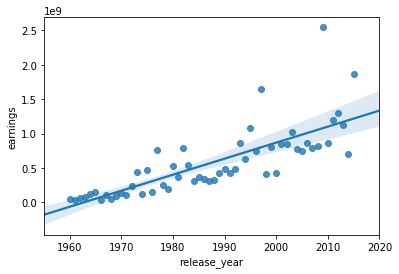

In [107]:
%matplotlib inline
import seaborn as sns
sns.regplot(best_movies['release_year'],best_movies['earnings'])
best_movies['earnings'].corr(best_movies['release_year'])

<b>10. Visualize losses through out the years</b>

The Below image suggests that the Losses have been almost consistenly more than 25% every Year after 1990.But we don't have any enough evidence if due to more release, Movies have produced less revenue, There seems to be some correlation but not every correlation can be causation.

<img src ="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXQAAAELCAYAAADJF31HAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAGQNJREFUeJzt3XuUnHV9x/H3h7DACuqSsmCyQIOKQWsk0RFp8ShSSyi1%0AEvFWrBqr58Seo622Gg1aL0drwaJiPd5OrCi2CqJixCulXA6KgmwIkmiMXETMJoesBxZQUgzh2z+e%0AZ2US5r7PzHOZz+ucOTv7zDMzv9/O7Hd+8/19n9+jiMDMzMpvn7wbYGZm2XBANzOrCAd0M7OKcEA3%0AM6sIB3Qzs4pwQDczqwgHdDOzinBANzOrCAd0M7OK2HeQT3bIIYfEokWLBvmUZmalt379+t9ExHi7%0A/QYa0BctWsTk5OQgn9LMrPQk/aqT/ZxyMTOrCAd0M7OKcEA3M6sIB3Qzs4pwQDczq4iBVrmY9du6%0ADVOcc+kWts3sZOHYKKuXL2bFsom8m2U2EA7oVhnrNkxx5sUb2blrNwBTMzs58+KNAA7qNhSccrHK%0AOOfSLX8I5rN27trNOZduyalFZoPlEbpVxraZnV1tN6tXhXSdR+hWGQvHRrvabjZrNl03NbOT4OF0%0A3boNU3k3rSsO6FYZq5cvZnRk3h7bRkfmsXr54pxaZGVRlXSdUy5WGbNfj8v+tdkGryrpOgd0q5QV%0AyyYcwK1rC8dGmWoQvMuWrnPKxcyGXlXSdR6hm1lflKlqpCrpurYBXdIBwNXA/un+X42I90j6PPBc%0A4J5019dExI39aqiZlUcZD/KqQrquk5TLA8BJEXEssBQ4RdLx6W2rI2JpenEwNzOgOlUjZdN2hB4R%0AAfw2/XUkvUQ/G2Vm5VaVqpGy6WhSVNI8STcCO4DLIuK69KYPSLpJ0rmS9u9bK82sVHyQVz46CugR%0AsTsilgKHA8dJeipwJnAM8ExgPvD2RveVtErSpKTJ6enpjJptZkVWlaqRsumqbDEiZoCrgFMiYnsk%0AHgA+BxzX5D5rI6IWEbXx8bYnrTazClixbIKzTl/CxNgoAibGRjnr9CWln3Qsuk6qXMaBXRExI2kU%0AeD7wQUkLImK7JAErgE19bquZZWQQJYVVqBopm07q0BcA50uaRzKivygiviXpijTYC7gR+Ps+ttPM%0AMlLGkkLrTCdVLjcByxpsP6kvLTKzvmpVUuiAXm4+9N9syLiksLoc0M2GjEsKq8sB3WzIuKSwurw4%0Al9mQqcpCVPZIDuhmQ8glhZ0r06qRDuhmZk2UrcTTAd3MSqvfo+eylXg6oJtZKQ1i9Fy2Ek9XuZhZ%0AKQ1izfWylXg6oJtZKQ1i9Fy2Ek8HdDMrpUGMnsu2aqRz6GZWeI0mP1cvX7xHDh36M3ouU4mnR+hm%0AJbJuwxQnnH0FR635NiecfQXrNkzl3aS+m538nJrZSbDn5GeZRs+D4BG6WU66LbkrW010VlpNfl6z%0A5qRK971bHqGb5aDZqLPViHsQVR1FVLbSwTx5hG6Wg14OWClqYMvy4J5Gj7VwbJSpBn0saulgnjxC%0AN8tBL8G5iDXRvXzT6PaxnnfMeKlKB/PkgG6Wg16C86BqoruZeM0yDdTssa78+bQnPzvklItZRrpJ%0APfRScjeIZW+7nXjNMg3U6rHKVDqYJwd0swx0GwjbBedmHw79Dmzd5vazzG87Vz53DuhmGehlkrNZ%0AcM6yPLHbCctuR9xZHtwzqAOFqsw5dLMMZJl6yCov3cuEZbe5/SwPjS/bYfZF5BG6WQayTBdk9eHQ%0Ay7eGXnP7WQVd58rnpm1Al3QAcDWwf7r/VyPiPZKOAi4E5gM3AK+KiN/3s7FmRZVluqCXD4dGqZVe%0APhh8vtG5y/OUdZ2M0B8AToqI30oaAX4g6bvAPwPnRsSFkj4NvA74VB/bWlhlOueg9UeWgbDbD4dm%0AOfexR41w9/27HrF/u28NHiX3Lu/lGdoG9IgI4LfpryPpJYCTgFek288H3ssQBvS8X0ArjqwCYbcf%0ADs1SK/vvuw+jI/M8yThAeZ+yrqMcuqR5wHrgicAngFuBmYh4MN1lKzCU0SvvF9CqqZsPh2YplHt2%0A7uLcly/1t8cBynt5ho4CekTsBpZKGgO+Djy50W6N7itpFbAK4Mgjj+yxmcWV9wto1irn7vTJYOVd%0AS99V2WJEzABXAccDY5JmPxAOB7Y1uc/aiKhFRG18fHwubS2kIq6vYcOlbKdJq7K8X4u2AV3SeDoy%0AR9Io8HxgM3Al8JJ0t5XAN/rVyCLL+wU0c/32IzVbj6bfJwjJ+7VQMufZYgfpaSSTnvNIPgAuioj3%0ASXo8D5ctbgBeGREPtHqsWq0Wk5OTmTS8SFzlYlYcexcqQDLIevEzJvja+qlHbO814A7y/17S+oio%0Atd2vXUDPUlUDupkVxwlnX9Ewjz1PYneDeDcxNso1a07q6jmafWj0azTeaUD3of9mVinNChIaBfNW%0A+7dS1LNHOaCbWaU0K0iYJ3W1fytFrW5zQLeh1u9JMhu8ZoUKZzzriMwKGIpa3eaAbkMry9OnWXE0%0AqzT51xVLMqtAKWp1mydFbWg1mzzrZZJsGLiaa0/d/j3m8vfrdFLUy+fa0CpqHrSIvGbRI3VzFO6g%0A/n5OudjQKmoetIiKWtVRFoP6+zmgWyllMZlZ1DxoEfnbzNwM6u/ngG6lk9VkZt6HaZeJv83MzaD+%0Afs6hW+lkuWSxVyPsjE/gPDeD+vs5oFvp+Ov/4PnUdHMzqL+fA7qVTt5rTg8rf5uZm0H8/ZxDt9Lx%0AZKZZYx6hW+n4679ZYw7oVkr++m9VktVRuA7oZmY5yvIoUufQzcxylOVRpA7oZmY5yrIM1wHdzCxH%0AWR5F6oBuZpajLMtwPSlqZpajLMtwHdDNzHKWVRmuUy5mZhXhgG5mVhFtA7qkIyRdKWmzpJ9KelO6%0A/b2SpiTdmF5O7X9zzcysmU5y6A8Cb4mIGyQ9Glgv6bL0tnMj4kP9a16x+CS5ZnPn/6P+aRvQI2I7%0AsD29fp+kzcDQ/fV9klyzufP/UX91lUOXtAhYBlyXbnqjpJsknSfp4IzbVig+Sa7Z3Pn/qL86DuiS%0ADgK+Brw5Iu4FPgU8AVhKMoL/cJP7rZI0KWlyeno6gybnw2fJsV5lcULrqvD/UXdm3zv7Pe6Jz+hk%0A/44CuqQRkmD+xYi4GCAi7oyI3RHxEPAZ4LhG942ItRFRi4ja+Ph4Z70oIJ8k13qR1Qmtq8L/R52r%0Af+90qpMqFwGfBTZHxEfqti+o2+1FwKYu2lo6PkuO9cIphj35/6hzjd477XRS5XIC8Cpgo6Qb023v%0AAM6QtBQI4Hbg9V09c8n4LDnWC6cY9uT/o8718h7ppMrlB4Aa3PSdrp+t5HyWHOuWT2j9SP4/6kyz%0A904rPlLUrI+cYrBeNXrvtOPFucz6yCkG61X9e2d7h/dRRPSvRXup1WoxOTk5sOczM6sCSesjotZu%0AP6dczMwqwgHdzKwiHNDNzCrCAd3MrCIc0M3MKsIB3cysIhzQzcwqwgHdzKwiHNDNzCrCAd3MrCIc%0A0M3MKsIB3cysIhzQzcwqwgHdzKwiHNDNzCrCAd3MrCIc0M3MKsIB3cysIhzQzcwqwgHdzKwiHNDN%0AzCpi33Y7SDoC+ALwOOAhYG1E/Iek+cCXgUXA7cDLIuLu/jW1tXUbpjjn0i1sm9nJwrFRVi9fzIpl%0AE3k1x8xs4DoZoT8IvCUingwcD7xB0lOANcDlEXE0cHn6ey7WbZjizIs3MjWzkwCmZnZy5sUbWbdh%0AKq8mmZkNXNuAHhHbI+KG9Pp9wGZgAjgNOD/d7XxgRb8a2c45l25h567de2zbuWs351y6JacWmZkN%0AXlc5dEmLgGXAdcBhEbEdkqAPHNrkPqskTUqanJ6enltrm9g2s7Or7WZmVdRxQJd0EPA14M0RcW+n%0A94uItRFRi4ja+Ph4L21sa+HYaFfbzcyqqKOALmmEJJh/MSIuTjffKWlBevsCYEd/mtje6uWLGR2Z%0At8e20ZF5rF6+OKcWmZkNXtuALknAZ4HNEfGRupsuAVam11cC38i+eZ1ZsWyCs05fwsTYKAImxkY5%0A6/QlrnIxs6GiiGi9g/Rs4PvARpKyRYB3kOTRLwKOBO4AXhoRd7V6rFqtFpOTk3Nts5nZUJG0PiJq%0A7fZrW4ceET8A1OTmP++2YWZm1h8+UtTMrCIc0M3MKqJtysUsT17SwaxzDuhWWLNLOsweBTy7pAPg%0AoG7WgFMuVlhe0sGsOx6hW+6apVW8pINZdxzQLVet0ioLx0aZahC8817SwXl9KyqnXCxXrdIqRVzS%0AwUs1W5E5oFuuWqVVirikg/P6VmROuViu2qVVViybKFQ6w3l9KzKP0C1XRUyrtOKlmq3IHNAtV0VM%0Aq7RStg8gGy5OuVjuipZWaWW2na5ysSIqZEAfRFmYS8+sV2X6ALLhUriAPojDvX1IuZlVUeFy6IMo%0AC3PpmZlVUeEC+iDKwlx6ZmZVVLiAPoiyMJeemVkVFS6gD6IszKVnZlZFhZsUHURZmEvPzKyKFBED%0Ae7JarRaTk5MDez4zsyqQtD4iau32K9wI3crPNf5m+XBAt0y5xt8sP20nRSWdJ2mHpE11294raUrS%0Ajenl1P4208rCNf5m+emkyuXzwCkNtp8bEUvTy3eybZaVlWv8zfLTNqBHxNXAXQNoi1WAa/zN8jOX%0AOvQ3SropTckcnFmLrNRc42+Wn14D+qeAJwBLge3Ah5vtKGmVpElJk9PT0z0+nZVF2dY3N6uSjurQ%0AJS0CvhURT+3mtr25Dt3MrHud1qH3NEKXtKDu1xcBm5rta2Zmg9G2Dl3SBcCJwCGStgLvAU6UtBQI%0A4Hbg9X1so5mZdaBtQI+IMxps/mwf2mJmZnNQuNUWzcysNw7oZmYV4YBuZlYRXpzL2vLqiWbl4IBu%0ALXn1RLPycMrFWvLqiWbl4YBuLXn1RLPycEC3lrx6oll5DDSgb5y6hxPOvoJ1G6YG+bQ2B1490aw8%0ABj4p6km1cpl9jVzlYlZ8Ha22mJX9FxwdC1Z+FEiWVb1mzUkDe24zs7Lq62qLWfCkmplZtnIL6J5U%0AMzPLVi4B3ZNqZmbZG/ik6IQn1czM+mKgAX3JxGM9EWpm1ic+sMjMrCK8ONdevLKgmZWVA3odryxo%0AZmXmgF6n1cqCDujDx9/WrGwc0Ot4ZUGb5W9rVkaeFK3jlQVtlteBtzJyQK/jlQVtlr+tWRk55VLH%0AKwtWV7f58IVjo0w1CN7+tmZF1jagSzoPeAGwIyKemm6bD3wZWATcDrwsIu7uXzMHZ8WyCQfwiukl%0AH756+eI97gP+tmbF10nK5fPAKXttWwNcHhFHA5env9uQWbdhihPOvoKj1ny70Ccu6SUfvmLZBGed%0AvoSJsVFEsmTFWacv8Ye9FVrbEXpEXC1p0V6bTwNOTK+fD1wFvD3DdlnBlakKpNd8uL+tWdn0Oil6%0AWERsB0h/Hppdk6wMylQF4uolGxZ9r3KRtErSpKTJ6enpfj+dDUiZqkBcvWTDoteAfqekBQDpzx3N%0AdoyItRFRi4ja+Ph4j09nRVOmUa/z4TYsei1bvARYCZyd/vxGZi2yUihbFYjz4TYMOilbvIBkAvQQ%0ASVuB95AE8oskvQ64A3hpPxtpxeOafbPiUUQM7MlqtVpMTk4O7PnMzKpA0vqIqLXbz4f+m5lVhAO6%0AmVlFOKCbmVWEA7qZWUU4oJuZVYQDuplZRTigm5lVhAO6mVlFOKCbmVWEA7qZWUU4oJuZVYQDuplZ%0ARTigm5lVRK/roVtJrdsw5SVvzSrKAX2IlOnEzmbWPadchkiZTuxsZt3zCH2ItDqxs1MxZuXnEfoQ%0AaXYC58eOjnDmxRuZmtlJ8HAqZt2GqcE20MzmxAF9iKxevpjRkXl7bBsdmYeEUzFmFeCAPkRWLJvg%0ArNOXMDE2ioCJsVHOOn0JM/fvarh/sxSNmRWTc+hDZsWyiUfkxs+5dAtTDYJ3sxSNmRWTR+jWNBWz%0AevninFpkZr3wCN3+MGJ3lYtZuc0poEu6HbgP2A08GBG1LBplg9coFWNm5ZLFCP15EfGbDB7HzMzm%0AwDl0M7OKmGtAD+B/JK2XtCqLBpmZWW/mmnI5ISK2SToUuEzSzyPi6vod0kC/CuDII4+c49OZmVkz%0AcxqhR8S29OcO4OvAcQ32WRsRtYiojY+Pz+XpzMysBUVEb3eUDgT2iYj70uuXAe+LiO+1uM808Kue%0AnrAcDgGGcYLY/R4u7vfg/XFEtB0RzyXlchjwdUmzj/OlVsEcoJMGlZmkyWEs3XS/h4v7XVw9B/SI%0AuA04NsO2mJnZHLhs0cysIhzQs7U27wbkxP0eLu53QfU8KWpmZsXiEbqZWUU4oLcg6TxJOyRtqtt2%0ArKQfSdoo6ZuSHpNu/1tJN9ZdHpK0NL3tGen+t0j6mNLSoKLqst8jks5Pt2+WdGbdfU6RtCXt95o8%0A+tKNLvu9n6TPpdt/IunEuvuU7fU+QtKV6ev3U0lvSrfPl3SZpJvTnwen25X26xZJN0l6et1jrUz3%0Av1nSyrz61Ike+n1M+l54QNJb93qsYrzXI8KXJhfgOcDTgU11264Hnptefy3w/gb3WwLcVvf7j4E/%0ABQR8F/jLvPuWVb+BVwAXptcfBdwOLALmAbcCjwf2A34CPCXvvmXY7zcAn0uvHwqsJzkuo4yv9wLg%0A6en1RwO/AJ4C/DuwJt2+Bvhgev3UtF8CjgeuS7fPB25Lfx6cXj847/5l2O9DgWcCHwDeWvc4hXmv%0Ae4TeQiTLGNy11+bFwOzyBpcBL25w1zOACwAkLQAeExE/iuTV/wKwoj8tzkaX/Q7gQEn7AqPA74F7%0ASY4aviUibouI3wMXAqf1u+1z0WW/nwJcnt5vBzAD1Er6em+PiBvS6/cBm4EJktfr/HS383m4H6cB%0AX4jEtcBY2u/lwGURcVdE3E3y9zplgF3pSrf9jogdEXE9sPc5GwvzXndA794m4IXp9ZcCRzTY5+Wk%0AAZ3kDbK17rat6bayadbvrwK/A7YDdwAfioi7SPr467r7V63fPwFOk7SvpKOAZ6S3lfr1lrQIWAZc%0ABxwWEdshCX4kI1Ro/tqW9jXvsN/NFKbfDujdey3wBknrSb6m/b7+RknPAu6PiNk8bKP8aRlLi5r1%0A+ziSE5wsBI4C3iLp8VS/3+eR/ONOAh8Ffgg8SIn7Lekg4GvAmyPi3la7NtgWLbYXWhf9bvoQDbbl%0A0m+fgq5LEfFz4GQASU8C/mqvXf6Gh0fnkPzTH173++HAtn62sR9a9PsVwPciYhewQ9I1QI1kxFL/%0A7aVS/Y6IB4F/mt1P0g+Bm4G7KeHrLWmEJKh9MSIuTjffKWlBRGxPUyo70u1bafzabgVO3Gv7Vf1s%0A91x12e9mmv09Bs4j9C4pWSoYSfsA/wJ8uu62fUi+ll84uy39ynafpOPTaodXA98YaKMz0KLfdwAn%0ApZUPB5JMkv2cZDLxaElHSdqP5IPuksG3fG6a9VvSo9L+IukvSE7B+LMyvt5pOz8LbI6Ij9TddAkw%0AW6mykof7cQnw6vQ1Px64J+33pcDJkg5OK0NOTrcVUg/9bqY47/W8Z5qLfCEZaW8nmQTZCrwOeBPJ%0AbPgvgLNJD85K9z8RuLbB49RIcrG3Ah+vv08RL930GzgI+ArwU+BnwOq6xzk13f9W4J159yvjfi8C%0AtpBMpP0vyWp4ZX29n02SIrgJuDG9nAr8EcnE783pz/np/gI+kfZvI1Cre6zXArekl7/Lu28Z9/tx%0A6fviXpJJ8K0kE+CFea/7SFEzs4pwysXMrCIc0M3MKsIB3cysIhzQzcwqwgHdzKwiHNDNzCrCAd1K%0AR9JVkgp9sl6zPDigWyGlRyEOxftT0ry822DVMBT/MFYOkhalJxv4JHAD8Kr0hAI3SPpKuojS3vc5%0AudE+kt4t6XpJmyStTQ/zRtI/SvpZemKGC9NtByo5ucX1kjZIarr0qaTvKz1xSfr7NZKe1uwx0j59%0AP23fDZL+LN1+opKTK3yJ5GhLs7nL+/BbX3yZvZAcTv8QyXowh5CsQ35getvbgXen168iOby+1T7z%0A6x73v4C/Tq9vA/ZPr4+lP/8NeOXsNpJDuA9s0saVwEfT608CJls9BslJPw5Itx9dt/+JJMsOH5X3%0A392X6ly82qIVza8i4lpJLyA5icQ16eB6P+BHe+17fIt9nifpbSQBdT7JWjPfJFm344uS1gHr0n1P%0ABl5Yd1qxA4AjSdZp2dtXgHdJWk2ybsnn2zzGNuDj6ah+N8mHwKwfR8QvO/mjmHXCAd2K5nfpT5Gc%0A/eaMFvs23EfSAcAnSRaN+rWk95IEWEiWv30OyUkr3iXpT9LHeXFEbGnXuIi4X9JlJGekeRnJN4XZ%0AtjziMdLnvhM4liTF+X8N+mqWCefQraiuBU6Q9ET4w3K1T+pwn9ng/Zs0p/6S9PZ9gCMi4krgbSSp%0AkYNIlnj9h7o8+7I2bftP4GPA9ZGcnYkWj/FYYHtEPAS8iuT8k2Z94YBuhRQR08BrgAsk3UQSvI/p%0AZJ+ImAE+QzLZuI5kvWpIgul/S9oIbADOTfd9PzAC3CRpU/p7q7atJ1lC9XN1m5s9xieBlZKuJUm3%0AeFRufePlc826JGkhycTsMenI26wQPEI364KkV5OcSPidDuZWNB6hmzUgaTnwwb02/zIiXpRHe8w6%0A4YBuZlYRTrmYmVWEA7qZWUU4oJuZVYQDuplZRTigm5lVxP8DEEj5o8ishwcAAAAASUVORK5CYII=" align='left'>

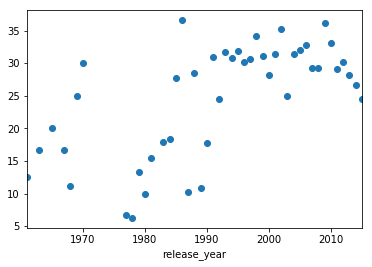

In [16]:
movies_df['earnings'] = movies_df['revenue'] - movies_df['budget']
loss_percent = ((movies_df[movies_df['earnings'] < 0].groupby('release_year')['release_year'].count() / movies_df.groupby('release_year')['release_year'].count()) * 100).dropna()
loss_percent.plot(style='o')

<b>11. Analyze the pattern of movie making by the most successful Director </b>

<ul>The Movie Career is well expanded since 1979. The Director makes max of 2 Movies in a Year</ul>

The Below Histogram gives us graphical representation of director's career

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXcAAAEICAYAAACktLTqAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAF89JREFUeJzt3X2UXHV9x/H3hxAwZSWowTGGyOqBtoeSo5IR6bEPs1iV%0AJ4mnQk8UhaB22x4t2BNagu3BltYW2+LTwcqJgvKgLBa0RoKliK7gAw8bCmxCfFgwbRYoUQMJiwis%0AfPvH/LZMJ7OZO7OzO5NfPq9z5uyde3/33u/89u5n79y5c68iAjMzy8s+3S7AzMw6z+FuZpYhh7uZ%0AWYYc7mZmGXK4m5llyOFuZpYhh7vtMST9taSrul2H2Z7A4W5mliGHu/UMSft2u4Ze5v6xVjjcrask%0AbZF0rqR7gSckvUzSdZJ+IunHks7azbzHSPqupMck3SOpUjPtTEmbJT0u6QFJf1QzbZGk69N82yXd%0AKmmfNO2lRdef2r9E0s8lvahm3PI0//z0/F2plkcl3Sjp0Jq2H5e0VdJOSRsk/XbNtL+WdK2kqyTt%0ABFa10re2d3O4Wy94G3Ai8ELgy8A9wBLg9cD7Jb2pfgZJS4D1wN+l+c4BrpN0cGqyDTgJOBA4E/io%0ApKPStNXAOHAwUAI+AEQK+K8WWf+UiPgfYBj4g5rR7wCGIuIZSW9Jy//9tL5bgatr2t4JvCq9hi8A%0A/yrpeTXTVwDXAgcBn5+uDrN6DnfrBZ+IiK3AkcDBEXFBRDwdEQ8AnwZWNpjnHcANEXFDRDwbETcB%0AI8AJABGxPiLuj6pvAf8BTO0VPwMsBg6NiGci4taoXmTpNS2sv9blqR4kzaP6z+rKNO2PgH+IiM0R%0AMQn8PfCqqb33iLgqIn4WEZMRcRGwP/BrNcv+XkT8W3qNTxbpTDNwuFtv2Jp+Hgq8NB0ueUzSY1T3%0AeksN5jkUOLWu7W9RDW0kHS/ptnTY5TGqob8ozftPwBjwH+mQzZo21l/rK8ARkl4BvAHYERF31Czz%0A4zXL2w6I6jsDJK1Oh2x2pOkLa+qs7RuzlvgDGusFU5cm3Qr8OCIOLzDPVuDKiPjD+gmS9geuA04H%0AvpIOj/wb1VAlIh6nemhmtaTfAL4p6c4W1/9c8RG/kPRF4DTg13lur32qzg9FxC6HVNLx9XOpHv7Z%0AFBHPSnp0qs6pxbdSi9kU77lbL7kD2Jk+YF0gaZ6kIyW9pkHbq4A3S3pTavc8SRVJhwD7UT288RNg%0AUtLxwBunZpR0kqTDJAnYCfwyPVpZf70rqH7geXKqbcolwHnpnwiSFko6NU17PjCZ6txX0vlUPyMw%0AmzGHu/WMiPgl8GaqHzD+GPgp8Bmqhyrq226l+mHjB6iG41bgz4F90p75WcAXgUeBtwPramY/HPg6%0AMAF8D/iXiBhuZf0N6vkO8CxwV0RsqRn/ZeDDwFA642UjcHyafCPwNeCHwH8Bv8CHYaxD5Jt1mHWG%0ApG8AX4iIz3S7FjOHu1kHpEM3NwFL0zsHs67yB6pmBUj6Gs+dSlnr76meuvgW4GwHu/UK77mbmWXI%0AH6iamWWoa4dlFi1aFP39/d1a/Zx74oknOOCAA7pdRs9zPxXjfiout77asGHDTyPi4Gbtuhbu/f39%0AjIyMdGv1c254eJhKpdLtMnqe+6kY91NxufWVpP8q0s6HZczMMuRwNzPLkMPdzCxDDnczsww53M3M%0AMuRwNzPLUOFwT5c//U9J1zeYtr+kaySNSbpdUn8nizQzs9a0sud+NrB5mmnvBh6NiMOAj1K9xKmZ%0AmXVJoXBPN0A4keq1rRtZQfU+klC9me/r040QzMysC4p+Q/VjwF9QvXNMI0tINxmIiElJO4AXUb3Z%0Awf+RNAgMApRKJYaHh9soec80MTGxV73edrmfinE/FTddX40+uGPui0mWLWl6/5cZaxrukk4CtkXE%0ABkmV6Zo1GLfL5SYjYi2wFqBcLkdOXwluJrevQM8W91Mx7qfipuurVWvWz30xyZbTKrO+jiKHZV4H%0AnCxpCzAEHCvpqro248BSAEn7Ur0t2fYO1mlmZi1oGu4RcV5EHBIR/cBK4BsR8Y66ZuuAM9LwKamN%0ALxRvZtYlbV8VUtIFwEhErAMuBa6UNEZ1j31lh+ozM7M2tBTuETEMDKfh82vG/wI4tZOFmZlZ+/wN%0AVTOzDDnczcwy5HA3M8uQw93MLEMOdzOzDDnczcwy5HA3M8uQw93MLEMOdzOzDDnczcwy5HA3M8uQ%0Aw93MLEMOdzOzDDnczcwy5HA3M8uQw93MLENNw13S8yTdIekeSZsk/U2DNqsk/UTS3enxntkp18zM%0AiihyJ6angGMjYkLSfODbkr4WEbfVtbsmIt7X+RLNzKxVTcM93eh6Ij2dnx6++bWZWQ8rdMxd0jxJ%0AdwPbgJsi4vYGzd4q6V5J10pa2tEqzcysJarumBdsLB0EfBn404jYWDP+RcBERDwl6Y+BP4iIYxvM%0APwgMApRKpeVDQ0MzrX+PMTExQV9fX7fL6Hnup2LcT8VN11ejD+7oQjVVy5YsbHvegYGBDRFRbtau%0ApXAHkPRB4ImI+Odpps8DtkfEbqsvl8sxMjLS0rr3ZMPDw1QqlW6X0fPcT8W4n4qbrq/616yf+2KS%0ALRee2Pa8kgqFe5GzZQ5Oe+xIWgD8HvD9ujaLa56eDGxurVwzM+ukImfLLAYuT3vk+wBfjIjrJV0A%0AjETEOuAsSScDk8B2YNVsFWxmZs0VOVvmXuDVDcafXzN8HnBeZ0szM7N2+RuqZmYZcribmWXI4W5m%0AliGHu5lZhhzuZmYZcribmWXI4W5mliGHu5lZhhzuZmYZcribmWXI4W5mliGHu5lZhhzuZmYZcrib%0AmWXI4W5mliGHu5lZhhzuZmYZKnIP1edJukPSPZI2SfqbBm32l3SNpDFJt0vqn41izcysmCJ77k8B%0Ax0bEK4FXAcdJOqauzbuBRyPiMOCjwIc7W6aZmbWiabhH1UR6Oj89oq7ZCuDyNHwt8HpJ6liVZmbW%0AEkXU53SDRtI8YANwGPDJiDi3bvpG4LiIGE/P7wdeGxE/rWs3CAwClEql5UNDQ20VPfrgjrbm66bS%0AAnjkyfbnX7ZkYeeK6WETExP09fUBe+bvea7MdHvqJbO9bdduU7W6uX3N5DUPDAxsiIhys3b7FllY%0ARPwSeJWkg4AvSzoyIjbWNGm0l77Lf42IWAusBSiXy1GpVIqsfher1qxva75uWr1skotGC3V3Q1tO%0Aq3SumB42PDzM1HaxJ/6e58pMt6deMtvbdu02Vaub29dc/D23dLZMRDwGDAPH1U0aB5YCSNoXWAhs%0A70B9ZmbWhiJnyxyc9tiRtAD4PeD7dc3WAWek4VOAb0SR4z1mZjYriryvWwxcno677wN8MSKul3QB%0AMBIR64BLgSsljVHdY185axWbmVlTTcM9Iu4FXt1g/Pk1w78ATu1saWZm1i5/Q9XMLEMOdzOzDDnc%0Azcwy5HA3M8uQw93MLEMOdzOzDDnczcwy5HA3M8uQw93MLEMOdzOzDDnczcwy5HA3M8uQw93MLEMO%0AdzOzDDnczcwy5HA3M8uQw93MLENF7qG6VNI3JW2WtEnS2Q3aVCTtkHR3epzfaFlmZjY3itxDdRJY%0AHRF3SXo+sEHSTRFxX127WyPipM6XaGZmrWq65x4RD0fEXWn4cWAzsGS2CzMzs/YpIoo3lvqBW4Aj%0AI2JnzfgKcB0wDjwEnBMRmxrMPwgMApRKpeVDQ0NtFT364I625uum0gJ45Mn251+2ZGHniulhExMT%0A9PX1AXvm73muzHR76iWzvW3XblO1url9zeQ1DwwMbIiIcrN2hcNdUh/wLeBDEfGlumkHAs9GxISk%0AE4CPR8Thu1teuVyOkZGRQuuu179mfVvzddPqZZNcNFrkKFhjWy48sYPV9K7h4WEqlQqwZ/6e58pM%0At6deMtvbdu02Vaub29dMXrOkQuFe6GwZSfOp7pl/vj7YASJiZ0RMpOEbgPmSFrVYs5mZdUiRs2UE%0AXApsjoiPTNPmJakdko5Oy/1ZJws1M7Piiryvex3wTmBU0t1p3AeAlwFExCXAKcCfSJoEngRWRisH%0A883MrKOahntEfBtQkzYXAxd3qigzM5sZf0PVzCxDDnczsww53M3MMuRwNzPLkMPdzCxDDnczsww5%0A3M3MMuRwNzPLkMPdzCxDDnczsww53M3MMuRwNzPLkMPdzCxDDnczsww53M3MMuRwNzPLkMPdzCxD%0ARe6hulTSNyVtlrRJ0tkN2kjSJySNSbpX0lGzU66ZmRVR5B6qk8DqiLhL0vOBDZJuioj7atocDxye%0AHq8FPpV+mplZFzTdc4+IhyPirjT8OLAZWFLXbAVwRVTdBhwkaXHHqzUzs0IUEcUbS/3ALcCREbGz%0AZvz1wIXpZtpIuhk4NyJG6uYfBAYBSqXS8qGhobaKHn1wR1vzdVNpATzyZLer6H3up2Jy6qdlSxbO%0A6vInJibo6+vbZXw3c2Qmr3lgYGBDRJSbtStyWAYASX3AdcD7a4N9anKDWXb5rxERa4G1AOVyOSqV%0AStHV/z+r1qxva75uWr1skotGC3f3Xsv9VExO/bTltMqsLn94eJhGWdPNHJnt1wwFz5aRNJ9qsH8+%0AIr7UoMk4sLTm+SHAQzMvz8zM2lHkbBkBlwKbI+Ij0zRbB5yezpo5BtgREQ93sE4zM2tBkfd1rwPe%0ACYxKujuN+wDwMoCIuAS4ATgBGAN+DpzZ+VLNzKyopuGePiRtdEy9tk0A7+1UUWZmNjP+hqqZWYYc%0A7mZmGXK4m5llyOFuZpYhh7uZWYYc7mZmGXK4m5llyOFuZpYhh7uZWYYc7mZmGXK4m5llyOFuZpYh%0Ah7uZWYYc7mZmGXK4m5llyOFuZpYhh7uZWYaK3EP1MknbJG2cZnpF0g5Jd6fH+Z0v08zMWlHkHqqf%0AAy4GrthNm1sj4qSOVGRmZjPWdM89Im4Bts9BLWZm1iGq3tu6SSOpH7g+Io5sMK0CXAeMAw8B50TE%0ApmmWMwgMApRKpeVDQ0NtFT364I625uum0gJ45MluV9H73E/F5NRPy5YsnNXlT0xM0NfXt8v4bubI%0ATF7zwMDAhogoN2vXiXA/EHg2IiYknQB8PCIOb7bMcrkcIyMjTdfdSP+a9W3N102rl01y0WiRo2B7%0AN/dTMTn105YLT5zV5Q8PD1OpVHYZ380cmclrllQo3Gd8tkxE7IyIiTR8AzBf0qKZLtfMzNo343CX%0A9BJJSsNHp2X+bKbLNTOz9jV9XyfpaqACLJI0DnwQmA8QEZcApwB/ImkSeBJYGUWO9ZiZ2axpGu4R%0A8bYm0y+meqqkmZn1CH9D1cwsQw53M7MMOdzNzDLkcDczy5DD3cwsQw53M7MMOdzNzDLkcDczy5DD%0A3cwsQw53M7MMOdzNzDLkcDczy5DD3cwsQw53M7MMOdzNzDLkcDczy5DD3cwsQ03DXdJlkrZJ2jjN%0AdEn6hKQxSfdKOqrzZZqZWSuK7Ll/DjhuN9OPBw5Pj0HgUzMvy8zMZqJpuEfELcD23TRZAVwRVbcB%0AB0la3KkCzcysdYqI5o2kfuD6iDiywbTrgQsj4tvp+c3AuREx0qDtINW9e0ql0vKhoaG2ih59cEdb%0A83VTaQE88mS3q+h97qdi3E/F9WJfLVuysO15BwYGNkREuVm7fdtew3PUYFzD/xgRsRZYC1Aul6NS%0AqbS1wlVr1rc1XzetXjbJRaOd6O68uZ+KcT8V14t9teW0yqyvoxNny4wDS2ueHwI81IHlmplZmzoR%0A7uuA09NZM8cAOyLi4Q4s18zM2tT0vYqkq4EKsEjSOPBBYD5ARFwC3ACcAIwBPwfOnK1izcysmKbh%0AHhFvazI9gPd2rCIzM5sxf0PVzCxDDnczsww53M3MMuRwNzPLkMPdzCxDDnczsww53M3MMuRwNzPL%0AkMPdzCxDDnczsww53M3MMuRwNzPLkMPdzCxDDnczsww53M3MMuRwNzPLkMPdzCxDhcJd0nGSfiBp%0ATNKaBtNXSfqJpLvT4z2dL9XMzIoqcg/VecAngTcA48CdktZFxH11Ta+JiPfNQo1mZtaiInvuRwNj%0AEfFARDwNDAErZrcsMzObiaZ77sASYGvN83HgtQ3avVXS7wA/BP4sIrbWN5A0CAwClEolhoeHWy4Y%0AYPWyybbm66bSgj2z7rnmfirG/VRcL/ZVu9nXiiLhrgbjou75V4GrI+IpSX8MXA4cu8tMEWuBtQDl%0AcjkqlUpr1Sar1qxva75uWr1skotGi3T33s39VIz7qbhe7Kstp1VmfR1FDsuMA0trnh8CPFTbICJ+%0AFhFPpaefBpZ3pjwzM2tHkXC/Ezhc0ssl7QesBNbVNpC0uObpycDmzpVoZmatavpeJSImJb0PuBGY%0AB1wWEZskXQCMRMQ64CxJJwOTwHZg1SzWbGZmTRQ6EBURNwA31I07v2b4POC8zpZmZmbt8jdUzcwy%0A5HA3M8uQw93MLEMOdzOzDDnczcwy5HA3M8uQw93MLEMOdzOzDDnczcwy5HA3M8uQw93MLEMOdzOz%0ADDnczcwy5HA3M8uQw93MLEMOdzOzDDnczcwyVCjcJR0n6QeSxiStaTB9f0nXpOm3S+rvdKFmZlZc%0A03CXNA/4JHA8cATwNklH1DV7N/BoRBwGfBT4cKcLNTOz4orsuR8NjEXEAxHxNDAErKhrswK4PA1f%0AC7xekjpXppmZtaLIDbKXAFtrno8Dr52uTURMStoBvAj4aW0jSYPAYHo6IekH7RS9JzoLFlHXH7Yr%0A91Mx7qfierGvNLNjG4cWaVQk3BvtgUcbbYiItcDaAuvMjqSRiCh3u45e534qxv1U3N7aV0UOy4wD%0AS2ueHwI8NF0bSfsCC4HtnSjQzMxaVyTc7wQOl/RySfsBK4F1dW3WAWek4VOAb0TELnvuZmY2N5oe%0AlknH0N8H3AjMAy6LiE2SLgBGImIdcClwpaQxqnvsK2ez6D3UXnk4qg3up2LcT8XtlX0l72CbmeXH%0A31A1M8uQw93MLEMO9zZJukzSNkkba8a9UtL3JI1K+qqkA9P4+ZIuT+M3SzqvZp7dXtohBy321X6S%0APpvG3yOpUjPP8jR+TNIncvuinKSlkr6ZtpFNks5O418o6SZJP0o/X5DGK/XDmKR7JR1Vs6wzUvsf%0ASTpjunXuidrop19P29pTks6pW1a+f38R4UcbD+B3gKOAjTXj7gR+Nw2/C/jbNPx2YCgN/wqwBein%0A+gH1/cArgP2Ae4Ajuv3autxX7wU+m4ZfDGwA9knP7wB+k+r3Kr4GHN/t19bhfloMHJWGnw/8kOol%0AP/4RWJPGrwE+nIZPSP0g4Bjg9jT+hcAD6ecL0vALuv36uthPLwZeA3wIOKdmOVn//XnPvU0RcQu7%0Ansv/a8Atafgm4K1TzYED0ncAFgBPAzspdmmHPV6LfXUEcHOabxvwGFCWtBg4MCK+F9W/zCuAt8x2%0A7XMpIh6OiLvS8OPAZqrf/q69vMflPPe6VwBXRNVtwEGpn94E3BQR2yPiUar9e9wcvpRZ1Wo/RcS2%0AiLgTeKZuUVn//TncO2sjcHIaPpXnvvx1LfAE8DDw38A/R8R2Gl/aYcnclNp10/XVPcAKSftKejmw%0APE1bQrV/pmTdV+nKqq8GbgdKEfEwVION6p4oTL/97DXbVcF+mk7W/eRw76x3Ae+VtIHq28Wn0/ij%0AgV8CLwVeDqyW9AoKXrYhU9P11WVU/8hGgI8B3wUm2Yv6SlIfcB3w/ojYubumDcbFbsZnpYV+mnYR%0ADcZl009Fri1jBUXE94E3Akj6VeDENOntwL9HxDPANknfAcpU9xqaXdohS9P1VURMAn821U7Sd4Ef%0AAY9S7Z8pWfaVpPlUA+vzEfGlNPoRSYsj4uF02GVbGj/dpUHGgUrd+OHZrHuutdhP0ylyaZU9lvfc%0AO0jSi9PPfYC/Ai5Jk/4bODad3XAA1Q+/vk+xSztkabq+kvQrqY+Q9AZgMiLuS2+zH5d0TDpL5nTg%0AK92pfnak13UpsDkiPlIzqfbyHmfw3OteB5yetqtjgB2pn24E3ijpBemMkTemcVloo5+mk/ffX7c/%0A0d1TH8DVVI+hP0N1D+DdwNlUP7n/IXAhz30DuA/4V2ATcB/w5zXLOSG1vx/4y26/rh7oq37gB1Q/%0AJPs6cGjNcspUj9XfD1w8NU8uD+C3qB4WuBe4Oz1OoHr57JupvoO5GXhhai+qN9K5HxgFyjXLehcw%0Alh5ndvu1dbmfXpK2u51UP6Afp/rhfNZ/f778gJlZhnxYxswsQw53M7MMOdzNzDLkcDczy5DD3cws%0AQw53M7MMOdzNzDL0v2clomLYUzYkAAAAAElFTkSuQmCC" align='left>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000186B65DB780>]], dtype=object)

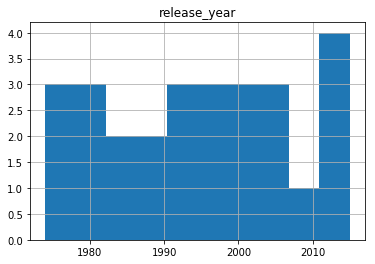

In [90]:
director = movies_df.groupby('director')['director'].count().sort_values(ascending=False).head(1)
best_directed_movies = movies_df[movies_df['director'] == director.keys()[0]][['release_year']]
best_directed_movies.hist(bins=10)

<b>Conclusion:</b>

<ul>1. Steven Spielberg is the most successful Director of all time.
-> He has produced most number of movies (27) with only one Failure which came in his first movie 1941.
   6 of his movies has feartured in most revenue created movies in past 55 years, Highest by any director. (please check Question No - 6,7,8)</ul>
   
<ul>2. Crime Based Movies have got the best ratings
-> Please see Question 1 </ul>
<ul>
3. Adventure Movies are the costliest to make.
-> All the top 5 costliest movie fall under Adventure gener
</ul>

<b>Limitations: </b>

<ul>1. I had to create a new column which contained earnings detail, If by defaukt this column would have been there then the analysis would have been easier</ul>
<ul>2. The Data should have been sorted by by date</ul>

Movies were considered for shortlisting only if below conditions were satisfied:

<ul>Movie run time is greater than 90 Minutes</ul>
<ul>budget is greater than 0</ul>
<ul>revenue is greater than 0</ul>
<ul>Director in not blank</ul>
